<a href="https://colab.research.google.com/github/MurtazaMister/ML/blob/master/ML_Lab09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=3, n_features=2,
cluster_std=0.2, random_state=0)

print(X)
print()
print(y)

[[ 2.17058568  0.85600391]
 [ 0.79717677  4.38116783]
 [ 2.24471791  0.86666164]
 [ 0.65349051  4.26123927]
 [ 0.76655949  4.01978374]
 [ 0.90668765  4.33505712]
 [-1.75639774  2.83031825]
 [-1.33701985  2.93539251]
 [ 2.18972647  0.97915603]
 [ 0.84940566  4.23123909]
 [ 1.12208819  4.32958391]
 [ 1.22232821  4.5442633 ]
 [ 2.14840001  0.59041492]
 [ 1.28282592  4.59765908]
 [-1.67585498  2.75259455]
 [ 2.42877931  1.07887259]
 [-1.54659452  2.7851866 ]
 [ 0.81364082  3.95853081]
 [-1.54055233  3.26055081]
 [-1.74778068  2.92831528]
 [-1.65562769  2.47320163]
 [-1.53476058  2.68426356]
 [-1.39887771  2.59449105]
 [ 0.79871293  3.90762803]
 [ 1.841117    1.10855401]
 [ 2.08064994  0.97806153]
 [ 1.90128431  1.0055135 ]
 [ 1.82223755  1.07782896]
 [-1.60074038  2.87000643]
 [-1.3725459   3.08258309]
 [ 1.00507879  4.59464203]
 [ 2.35291796  1.2768415 ]
 [ 1.97254373  0.7481727 ]
 [ 1.27508589  4.26275567]
 [-1.61801051  2.92137809]
 [-1.05027506  3.10677816]
 [ 0.95562631  4.38590703]
 

In [2]:
import pandas as pd

df = pd.DataFrame(X, columns=["X", "Y"])
df.head()


,X,Y
0,2.170586,0.856004
1,0.797177,4.381168
2,2.244718,0.866662
3,0.653491,4.261239
4,0.766559,4.019784


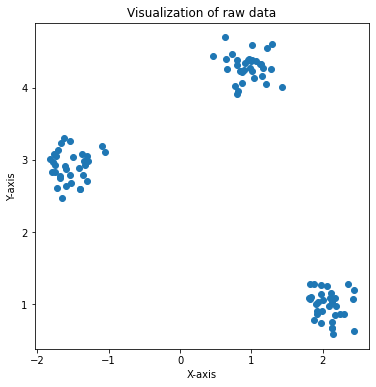

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline



# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter( df["X"], df["Y"])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Visualization of raw data');

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
kmeans.labels_


array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2], dtype=int32)

In [6]:
# kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

array([[ 0.95164831,  4.28882085],
       [ 2.0720792 ,  0.98848385],
       [-1.538563  ,  2.91165191]])

In [7]:
# add column to the df

df["labels"] = kmeans.labels_
df.head()

,X,Y,labels
0,2.170586,0.856004,1
1,0.797177,4.381168,0
2,2.244718,0.866662,1
3,0.653491,4.261239,0
4,0.766559,4.019784,0


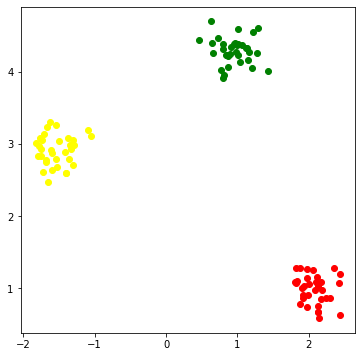

In [8]:
# plotting cluster data

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(df["X"][df["labels"] == 0] , df["Y"][df["labels"] == 0],
            c='green', label='cluster 1')
plt.scatter(df["X"][df["labels"] == 1] , df["Y"][df["labels"] == 1],
            c='red', label='cluster 2')
plt.scatter(df["X"][df["labels"] == 2] , df["Y"][df["labels"] == 2],
            c='yellow', label='cluster 3')

In [9]:
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print(silhouette_score)

0.8816040239688525


#Handwritten digit dataset

In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [13]:
digits = load_digits()

In [14]:
print(digits.data, len(digits.data))
print()
print(digits.target, len(digits.target))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 1797

[0 1 2 ... 8 9 8] 1797


In [15]:

kmeans = KMeans(n_clusters=10,random_state=0)

In [16]:
clusters = kmeans.fit_predict(digits.data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


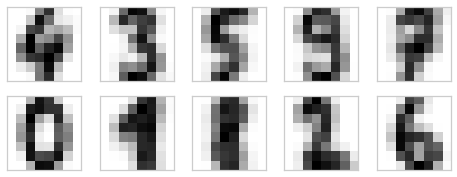

In [17]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) #Create a figure and a set of subplots( 2 rows and 5 columns)
centers = kmeans.cluster_centers_.reshape(10,8,8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)

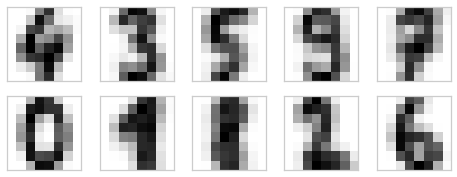

In [18]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) #Create a figure and a set of subplots( 2 rows and 5 columns)
centers = kmeans.cluster_centers_.reshape(10,8,8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)

In [19]:
kmeans.cluster_centers_

array([[ 0.00000000e+00,  2.22044605e-16,  3.07228916e-01,
         7.16265060e+00,  1.19457831e+01,  1.93373494e+00,
         1.50602410e-01,  5.42168675e-02,  1.73472348e-18,
         1.20481928e-02,  3.28313253e+00,  1.37951807e+01,
         8.46385542e+00,  1.53012048e+00,  9.75903614e-01,
         2.77108434e-01,  8.67361738e-19,  6.44578313e-01,
         1.07108434e+01,  1.15602410e+01,  4.33734940e+00,
         5.25903614e+00,  3.87349398e+00,  3.25301205e-01,
         6.02409639e-03,  4.75903614e+00,  1.47590361e+01,
         5.86144578e+00,  6.87951807e+00,  1.07530120e+01,
         6.21686747e+00,  1.80722892e-02,  0.00000000e+00,
         8.92771084e+00,  1.48072289e+01,  9.35542169e+00,
         1.28132530e+01,  1.43915663e+01,  5.48192771e+00,
         0.00000000e+00,  9.63855422e-02,  6.50602410e+00,
         1.16867470e+01,  1.23433735e+01,  1.48373494e+01,
         1.07590361e+01,  1.56626506e+00,  0.00000000e+00,
         6.02409639e-02,  1.11445783e+00,  3.00000000e+0

In [20]:
print(len(clusters))
print()
print(clusters)

1797

[5 7 7 ... 7 3 3]


In [21]:
labels = np.zeros_like(clusters) # blank labels 
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10): 
    mask = (clusters == i) 
    #if a specific digit belongs to/equivalent a specific cluster then its True else False
    print(mask)
    labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False  True  True]
[False False False ... False False False]
[ True False False ... False False False]
[False False False ... False False False]
[False  True  True ...  True False False]
[False False False ... False False False]
[False False False ... False False False]


<ipython-input-21-c3798383276a>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


In [22]:
accuracy = accuracy_score(digits.target, labels)
accuracy

0.7935447968836951

In [23]:
precision = precision_score(digits.target, labels, average="micro")
precision

0.7935447968836951

In [24]:
recall = recall_score(digits.target, labels, average="micro")
recall

0.7935447968836951

#Exercise

In [25]:
arr = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])  
arr

array([[ 2, 10],
       [ 2,  5],
       [ 8,  4],
       [ 5,  8],
       [ 7,  5],
       [ 6,  4],
       [ 1,  2],
       [ 4,  9]])

In [26]:
kmeans_for_arr = KMeans(n_clusters=3,random_state=0, max_iter=3)
clusters_for_arr = kmeans_for_arr.fit_predict(arr)
kmeans_for_arr.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[7.        , 4.33333333],
       [3.66666667, 9.        ],
       [1.5       , 3.5       ]])